In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.patches import Polygon
import matplotlib.cm as cmx
import matplotlib.colors as colors
import operator as op
from functools import reduce

In [3]:
def choose(n,r):
    r = min(r, n-r)
    nr = reduce(op.mul, range(n, n-r, -1), 1)
    dr = reduce(op.mul, range(1, r+1), 1)
    return nr // dr
    

def get_bernstein_poly(to,t,tf):

    u=(t-t0)/(tf-t0)
    
    B0= 1*((1-u)^2)
    B1= 2*((1-u)^1)*u
    B2= 1*(u^2)
    
    return B0,B1,B2

def get_bernstein_differentials( t0,t,tf ):
    
    B0dot = (2*(t - tf))/(tf - t0)^2
    B1dot = 2*(-2*t + t0 + tf)/(tf - t0)^2
    B2dot = (2*(t - t0))/(tf - t0)^2
    
    return B0dot, B1dot, B2dot, B3dot


def get_product_functions( x0,x1,x2,x3,t0,t,tf ):
    
    P=x0
    Q=x1
    R=x2
    S=x3
    A= (x0*(tf - to)^4 -(t-tf)^4 / 2*(t0-tf)^4) + ((2 (-t^4/2 + (1/3) * t^3 (t0 + 5*t1) - t^2 * t1* (t0 + 2*t1) + t*t1^2 *(t0 + t1)))/(t0 - t1)^4 )+(t*(3*t^3 - 4*t^2 (t0 + 2*t1) + 6*t*t1*(2*t0 + t1) - 12*t0*t1^2))/(6*(t0 - t1)^4) + 
    B= -(t*(3*t^3 - 4*t^2 (t0 + 2*t1) + 6*t*t1*(2*t0 + t1) - 12 t0 t1^2))/(3 (t0 - t1)^4)
    C= choose(3,2)*((1-u))*(u^2)

    
    
    
    return coef0t, coef1t, coef2t, coef3t

In [4]:
def DetermineBernsteinCoeffsX( x0 , xf , xc  , dx0, dx_f , dxc , t0, tc , tf  ):
    
    t0,t,tf = t0, tc,tf
    Wx0 = x0
    Wx5 = xf
    
    
    
    Bc0,Bc1,Bc2,Bc3,Bc4,Bc5 = get_bernstein_poly( t0 , tc , tf )
    Bc0dot, Bc1dot, Bc2dot, Bc3dot, Bc4dot, Bc5dot = get_bernstein_differentials( t0, tc , tf)
    B00dot, B01dot, B02dot, B03dot, B04dot, B05dot = get_bernstein_differentials( t0, t0 , tf)
    Bf0dot, Bf1dot, Bf2dot, Bf3dot, Bf4dot, Bf5dot = get_bernstein_differentials( t0, tf , tf)
    
    Ax = np.array( [ [ xc - Wx0*Bc0 -Wx5*Bc5  ]  , 
                     [dx0 - Wx0*B00dot - Wx5*B05dot  ] , 
                     [ dx_f - Wx0*Bf0dot - Wx5*Bf5dot ] ] ) 
#                      [dxc - Wx0*Bc0dot - Wx5*Bc5dot ] ])
    
    Bx = np.array( [ [ Bc1,Bc2,Bc3,Bc4  ] , 
                     [ B01dot, B02dot, B03dot, B04dot ] , 
                     [Bf1dot, Bf2dot, Bf3dot, Bf4dot   ] ])  
#                      [ Bc1dot, Bc2dot, Bc3dot, Bc4dot ] ] )
    W = np.linalg.inv( Bx.T@Bx + np.eye(4)*0.002 )@Bx.T@Ax   #np.linalg.inv( Bx)@Ax
    
    
    Wx = np.array( [Wx0 , W[0][0] ,W[1][0], W[2][0] , W[3][0] , Wx5  ])
    
    return Wx    

In [5]:
def DetermineBernsteinCoeffsK( k0, kf, kc ,  kdott0 , kdottf , yt0, ytc , ytf , t0 , tf , Wx , tc ):
    
    Wk0 = k0
    Wkf = kf
    
#     print( t0 , tf, tc )
    
    t0 , tf, tc  = 0 , 50 , 10
    
    
    
    
    coef0t0, coef1t0, coef2t0, coef3t0, coef4t0, coef5t0 = get_product_functions( Wx[0] ,Wx[1]
                                                                                 ,Wx[2],Wx[3],Wx[4],Wx[5],
                                                                                 t0,t0,tf )
    coef0tf, coef1tf, coef2tf, coef3tf, coef4tf, coef5tf = get_product_functions( Wx[0] ,Wx[1]
                                                                                 ,Wx[2],Wx[3],Wx[4],Wx[5],
                                                                                 t0,tf,tf )
    coef0tc, coef1tc, coef2tc, coef3tc, coef4tc, coef5tc = get_product_functions( Wx[0] ,Wx[1]
                                                                                 ,Wx[2],Wx[3],Wx[4],Wx[5],
                                                                                 t0,tc,tf )  
    
    
    B00dot, B01dot, B02dot, B03dot, B04dot, B05dot = get_bernstein_differentials( t0, t0 , tf)
    Bf0dot, Bf1dot, Bf2dot, Bf3dot, Bf4dot, Bf5dot = get_bernstein_differentials( t0, tf , tf)
    
    
    Bc0,Bc1,Bc2,Bc3,Bc4,Bc5 = get_bernstein_poly( t0 , tc , tf )
    B00,B01,B02,B03,B04,B05 = get_bernstein_poly( t0 , t0 , tf )
    Bf0,Bf1,Bf2,Bf3,Bf4,Bf5 = get_bernstein_poly( t0 , tf , tf )
    
    k0, kf , yt0,ytf ,kc, ytc = 0 ,0,0,40,1,40

    
    Ak = np.array( [ [k0 -Wk0*B00 -  Wkf*B05 ] , 
                   [  kf -Wk0*Bf0 - Wkf*Bf5   ]  , 
                   [ yt0 - Wk0*coef0t0 -  Wkf*coef5t0  ] , 
                   [ ytf - Wk0*coef0tf -  Wkf*coef5tf  ] , 
                   [  kc - Wk0*Bc0 - Wkf*Bc5 ] , 
                   [ ytc - Wk0*coef0tc - Wkf*coef5tc  ]])
    
    Bk = np.array( [ [ B01,B02,B03,B04 ] , 
                   [ Bf1,Bf2,Bf3,Bf4 ] , 
                   [ coef1t0, coef2t0, coef3t0, coef4t0 ] , 
                    [coef1tf, coef2tf, coef3tf, coef4tf ], 
                    [Bc1,Bc2,Bc3,Bc4],
                    [ coef1tc, coef2tc, coef3tc, coef4tc ] 
                   ])
    
    
#     Ak = np.array([ [ yt0 - Wk0*coef0t0 -  Wkf*coef5t0   ] , 
#                     [ ytf - Wk0*coef0tf -  Wkf*coef5tf ]  , 
#                     [ ytc - Wk0*coef0tc - Wkf*coef5tc  ] , 
#                     [ kc - Wk0*Bc0 - Wkf*Bc5  ]])
    
#     Bk = np.array( [[ coef1t0, coef2t0, coef3t0, coef4t0 ] , 
#                    [ coef1tf, coef2tf, coef3tf, coef4tf  ] , 
#                    [coef1tc, coef2tc, coef3tc, coef4tc ] , 
#                    [ Bc1,Bc2,Bc3,Bc4  ]])
    
    W = np.linalg.inv(Bk.T@Bk  + np.eye(4)*0.002  )@(Bk.T)@Ak
    
    
    
    Wk = [ Wk0 , W[0][0] , W[1][0] , W[2][0] , W[3][0] , Wkf ] 
    
    
    return Wk


In [6]:
def GetXPts( Wx , t0, tf , numPts ):
    
    delval = ( tf -t0)/(numPts)
    T = []
    
    for i in range( numPts+1 ):
        T.append( t0 + i*delval)
        
    T  = np.asarray(T)
    
    X = []
    
    for i in range(numPts +1 ):
        
        B0,B1,B2,B3,B4,B5 = get_bernstein_poly(t0,T[i],tf)
        B = np.array( [ B0,B1,B2,B3,B4,B5 ])
        xpt = Wx@B
        X.append(xpt)
    
    
    return X
        

In [7]:
def GetYpts( y0, Wk,t0, tf , numPts , Wx   ):
    
    delval = ( tf -t0)/(numPts)
    T = []
    
    for i in range( numPts+1 ):
        T.append( t0 + i*delval)
    
    T  = np.asarray(T)
        
    Y = []
    
    Wx0,Wx1,Wx2,Wx3,Wx4,Wx5 = Wx[0] , Wx[1] , Wx[2] , Wx[3] , Wx[4] , Wx[5]
    
    
    for i in range( numPts +1 ):
        
        coef0t, coef1t, coef2t, coef3t, coef4t, coef5t = get_product_functions( Wx0,Wx1,Wx2,Wx3,Wx4,Wx5,t0,T[i],tf )
        F = np.array( [coef0t, coef1t, coef2t, coef3t, coef4t, coef5t ])
        ypt = y0 + Wk@F
        Y.append(ypt)
    
    
    return Y
        
            
    

In [8]:
def vis_trajectory( Xpts, Ypts ):
    
    plt.plot(Xpts, Ypts )
    plt.show() 

    

In [9]:
class agent:
    def __init__(self,rad,tf,tw,start,waypt,goal,init_or,waypt_or,final_or,dx_0,dx_f,dx_w):
        
        self.init_or = init_or
        self.final_or = final_or
        self.waypt_or = waypt_or
        xdoto=0  
        xdotf=0
        self.k0=np.tan(self.init_or)   # tangent of the initial heading angle of the robot
        self.kdot0=0 # differntial of the tangent of the initial heading angle of the robot
        self.kw = np.tan(self.waypt_or)
        self.kdotw = 0
        self.kf=np.tan(self.final_or)     #  tangent of the final heading angle of the robot
        self.kdotf=0  # differntial of the tangent of the final heading angle of the robot
        self.rad = rad
        self.t0 = 0
        self.tf = tf
        self.tw = tw
        self.pos = start
        self.x = []
        self.y = []
        self.xdot = []
        self.ydot = []
        self.goal = goal
        self.origin = start
        self.waypt = waypt
        self.xf = self.goal[0]
        self.yf = self.goal[1]
        self.dx_0 = dx_0
        self.dx_f = dx_f
        self.dx_w = dx_w
        
        self.x0 = self.pos[0]
        self.y0 = self.pos[1]
        self.xc = self.waypt[0]
        self.yc = self.waypt[1]
        
        self.dxc = (self.dx_0 +self.dx_f )/2 + 3
        self.dyc = (self.dx_f +self.dx_f )/2
        
        self.tc = self.tw

                    
    def get_overall_traj(self):
         
        Wx = DetermineBernsteinCoeffsX(self.x0 , self.xf , self.xc  , self.dx_0, self.dx_f ,  self.dxc , self.t0 ,self.tc  ,  self.tf )
#         print(Wx)
        
        Wk = DetermineBernsteinCoeffsK( self.k0 , self.kf , self.kw  ,  self.dx_w , self.dx_w , 
                                       self.pos[1] , self.goal[1]  , self.t0 , self.tc , self.tf , Wx , self.tc )
        
        
        Xpts = GetXPts( Wx , self.t0, self.tf , 20 )
        
        Ypts = GetYpts( self.y0  , Wk,self.t0, self.tf , 20 , Wx )
        
        print( Xpts )
        print(Ypts  )
        
        
        vis_trajectory( Xpts, Ypts )

              
    def visualize_traj(self,time):
        """
        Function to visualize robot trajectory at a given timestamp. 
        Saves snapshots to /data folder as snap0.png, snap1.png...
        String the snapshots using the bash script mkmovie.sh to generate simulation video.
        """
        figure = plt.figure()
        ax = figure.add_subplot(1,1,1)
        robot = matplotlib.patches.Circle(
            (self.pos[0],self.pos[1]),
            radius = self.rad,
            edgecolor='black',
            linewidth=1.0,
            ls='solid',
            alpha=1,
            zorder=2)
        ax.add_patch(robot)
        name = 'data/snap%s.png'%str(time)
        ax.plot([self.goal[0]], [self.goal[1]], '*', color="red", markersize =15,linewidth=3.0)
        ax.plot([self.waypt[0]], [self.waypt[1]], '*', color="green", markersize =15,linewidth=3.0)
        ax.plot(self.x,self.y,"b--")
        ax.set_aspect('equal')
        ax.set_xlim(-10.0, 60.0)
        ax.set_ylim(-10.0, 60.0)
        ax.set_xlabel(r'$x (m)$')
        ax.set_ylabel(r'$y (m)$')
        ax.grid(True)
        plt.savefig(name, dpi = 200)
        plt.cla()
        plt.close(figure)
        return figure

[0.0, 1.1762224807692288, 2.4326503756708373, 3.6792631024150215, 4.8718998211091185, 6.004627180232552, 7.102107062611799, 8.211964331395343, 9.397154576028615, 10.728331858228977, 12.27621645796064, 14.103962619409655, 16.259526296958853, 18.76803290116279, 21.624145044722724, 24.78443028846154, 28.159728887298748, 31.607521536225406, 34.924297116279064, 37.837920440518786, 40.0]
[0.0, 6.104674165818987, 19.10751121626267, 31.61796974893307, 39.15505890406576, 40.18050601875011, 34.84440756298999, 23.777571206252777, 7.511430386616314, -13.411227028013755, -37.88477469773581, -63.638875128866935, -86.97524806577677, -103.12047479447641, -107.2816476866778, -96.25348537959238, -70.17108884335624, -33.76315944348568, 3.732415824933209, 30.943837261700658, 39.99074674730301]


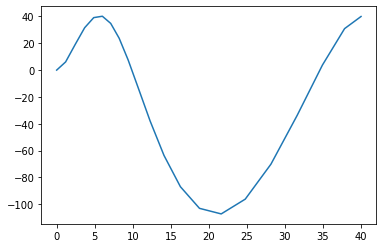

In [10]:
bot = agent(2,50,10,[0,0],[5,40],[40,40],0,np.pi/4,0,0,0,0) #try with various parameters
bot.get_overall_traj()